In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import margins

# loading the data from the given file
df = pd.read_csv('product_sales.csv')

# reading first 5 rows to see the data
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## 1. Data validation

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [40]:
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


In [41]:
print(df['years_as_customer'].unique())

[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]


### Standardizing sales method

In [42]:
# making a map of standardized values
mapping = {
    'Email': 'Email',
    'Email + Call': 'Email + Call',
    'Call': 'Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}

# replacing values
df['sales_method'] = df['sales_method'].map(mapping)

# checking result
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call']


### Dealing with revenue missing data

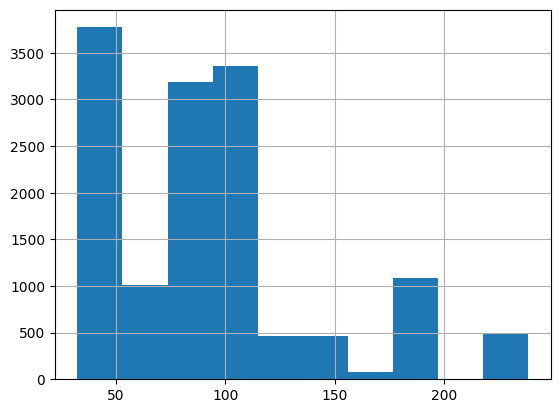

In [43]:
df['revenue'].hist()
plt.show()

because distribution is skewed to right (there are some high outliers) I will use median for filling missing data

In [44]:
df['revenue'] = df['revenue'].fillna(df['revenue'].median())

#checking result
print(df['revenue'].isna().sum())

0


### Years cleaned

In [45]:
df.loc[df['years_as_customer'] > 41, 'years_as_customer'] = 41
print((df['years_as_customer'] > 41).sum())

0


### Conclusion after cleaning

In [46]:
print(df.isna().sum())
df.shape

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


(15000, 8)

## 2. EDA

### How many customers were there for each approach?

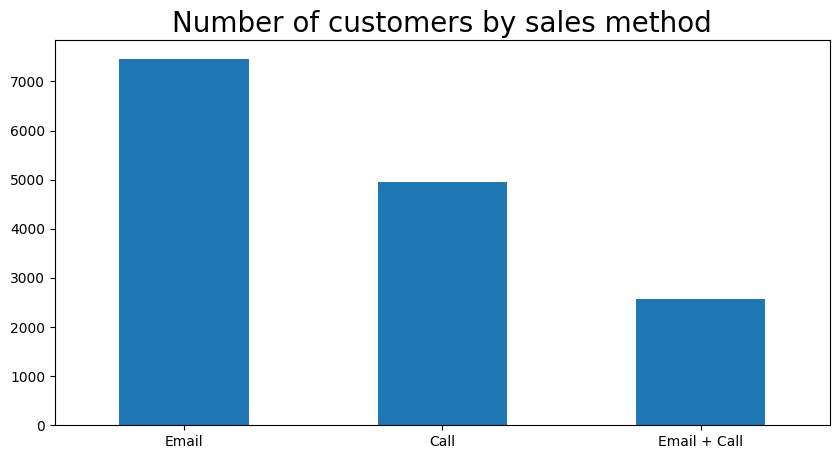

In [47]:
method_count = df['sales_method'].value_counts()

plt.figure(figsize=(10, 5))
method_count.plot(kind='bar')

plt.title('Number of customers by sales method', fontsize=20)
plt.xlabel('')
plt.xticks(rotation=0)

plt.show()

Almost half of all customers were contacted through email. It requires the least effort from sales team, so there are more companies (potential customers) which have been contacted through emails leading to a higher customer amount with this method.

In [48]:
print(df['sales_method'].value_counts())

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


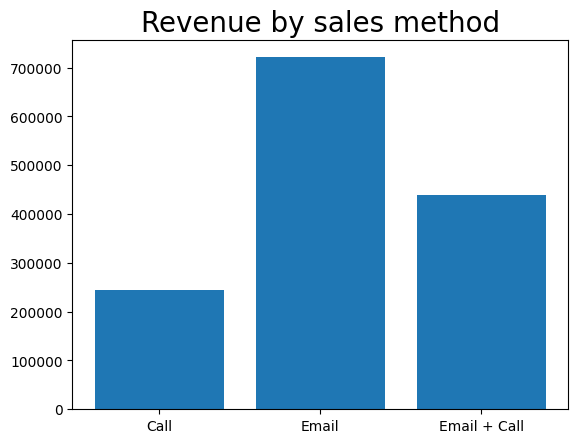

In [49]:
revenue_by_method = df.groupby('sales_method')['revenue'].sum()

plt.bar(revenue_by_method.index, height=revenue_by_method.values)

plt.title('Revenue by sales method', fontsize=20)
plt.show()

Email method brought most of the revenue

### What does the spread of the revenue look like overall? And for each method?

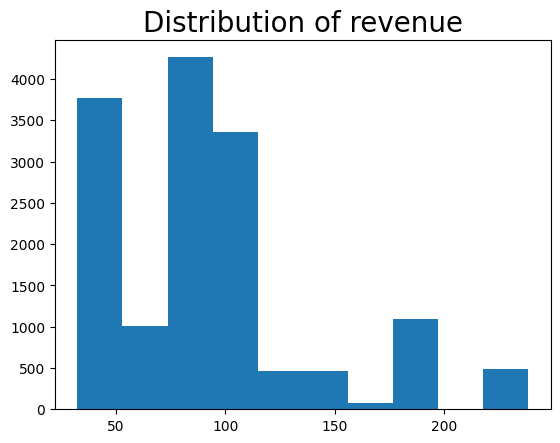

In [50]:
df['revenue'].hist()

plt.title('Distribution of revenue', fontsize=20)
plt.grid(False)
plt.show()

the majority of revenue is concentrated under 120 USD.

<Figure size 2000x1000 with 0 Axes>

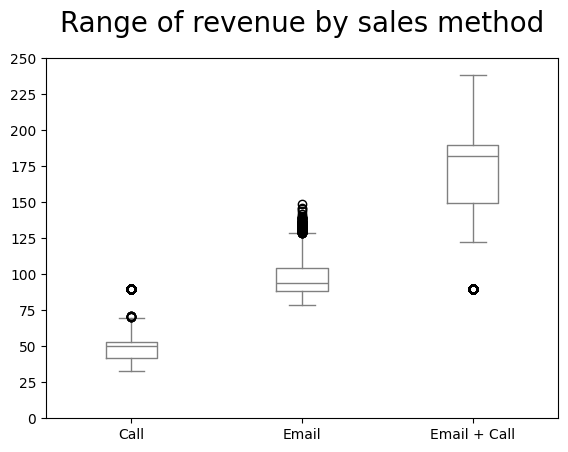

In [51]:
plt.figure(figsize=(20, 10))
df.boxplot(column='revenue', by='sales_method', grid=False, color='gray')

plt.title('Range of revenue by sales method', fontsize=20, y=1.05)
plt.suptitle('')  # Remove the default pandas caption
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.yticks(np.arange(0,df['revenue'].max() + 25, 25)) #adjust the step for y-ticks
plt.show()

We can see that Emails are concentrated under 110, calls under 55, and emails + calls are more spread out and hove higher values overall. This shows us that calling a customer does not lead to higher revenue compared to Email method despite greater effort by sales team. But if sales team emails and then calls a customer this leads to increased revenue.

In [52]:
emails = df.loc[df['sales_method'] == 'Email']
calls = df.loc[df['sales_method'] == 'Call']
emails_calls = df.loc[df['sales_method'] == 'Email + Call']

### Was there any difference in revenue over time for each of the methods?

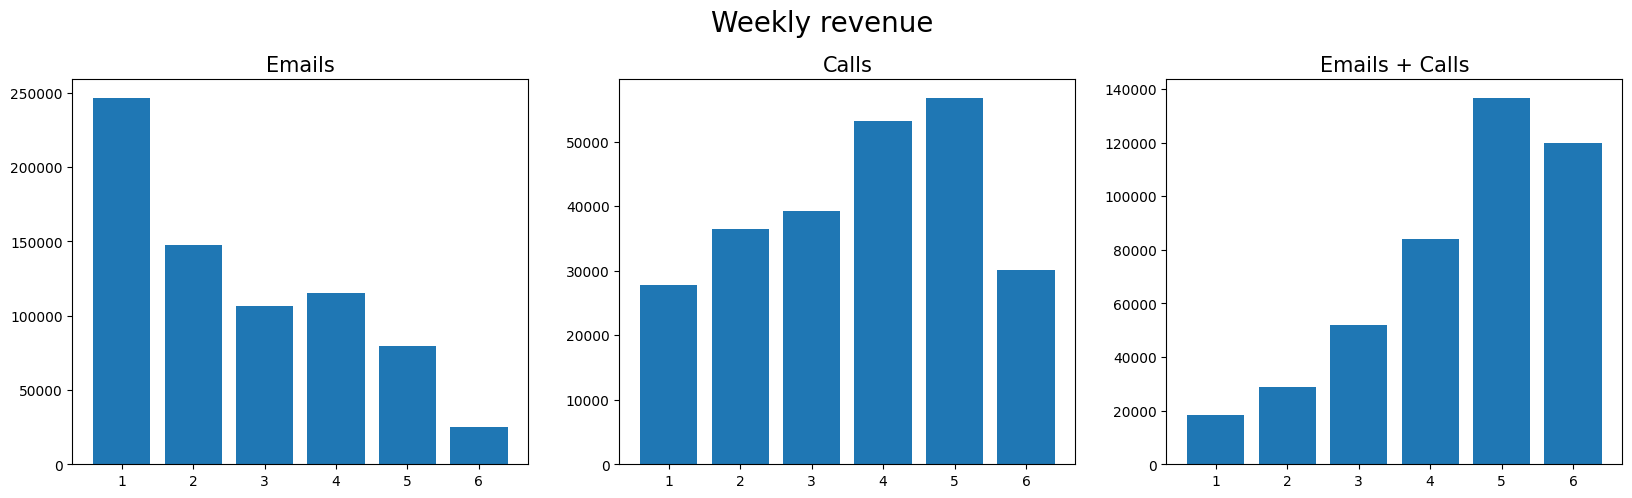

In [53]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

emails_revenue_by_week = emails.groupby('week')['revenue'].sum()
calls_revenue_by_week = calls.groupby('week')['revenue'].sum()
emails_calls_revenue_by_week = emails_calls.groupby('week')['revenue'].sum()

ax[0].bar(x=emails_revenue_by_week.index, height=emails_revenue_by_week.values)
ax[0].set_title('Emails', fontsize=15)

ax[1].bar(x=calls_revenue_by_week.index, height=calls_revenue_by_week.values)
ax[1].set_title('Calls', fontsize=15)

ax[2].bar(x=emails_calls_revenue_by_week.index, height=emails_calls_revenue_by_week.values)
ax[2].set_title('Emails + Calls', fontsize=15)

fig.suptitle('Weekly revenue', fontsize=20, y=1.02)
plt.show()

Emails method has seen a decline in revenue over time with first week being at ≈ 246,000 USD and 6th week at 25,000 USD (a 90% decline). Second week also showed a significant drop of 40%. Average week-to-week change was minus 31% It is significant drop which could be due to the fact that first email was sent at the new product line launch which created a 'wow-effect'.

Calls method has seen a steady growth (average 6.9%) with two major increases at week 2 (+31%) and week 4 (+35%). Major drop occured at week 6 (-46%)

Emails + Calls method showed the highest weekly average revenue increase of almost 50%.

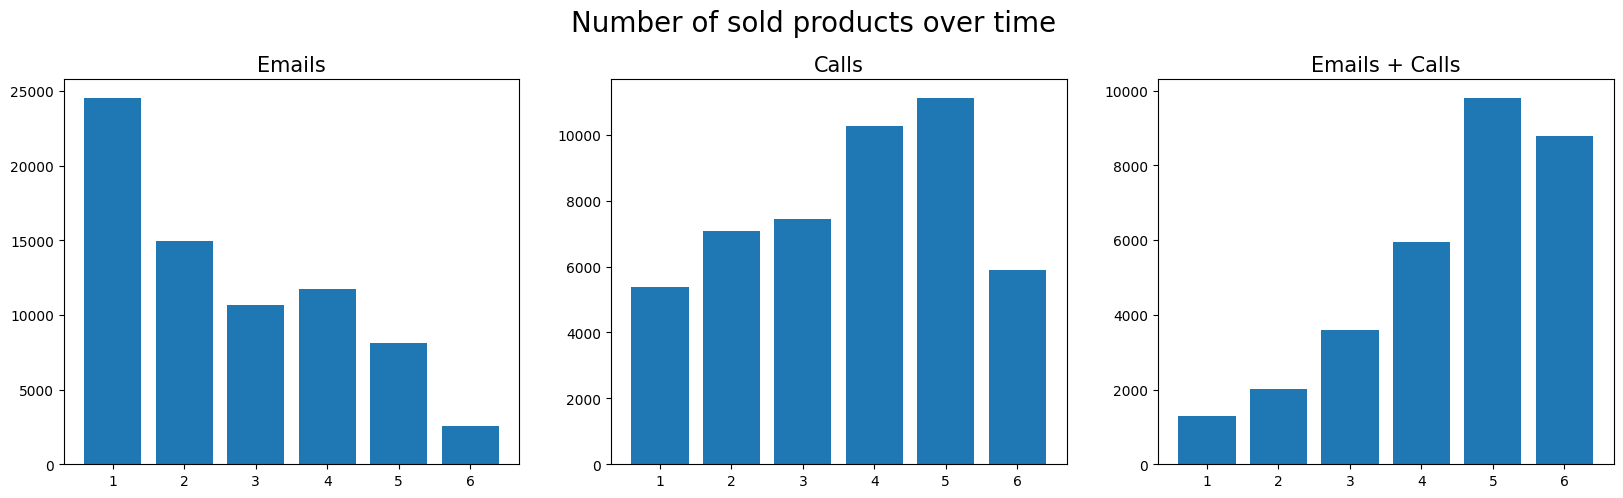

In [54]:
# now let's check if this remains true for the number of products sold

fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

emails_sold_by_week = emails.groupby('week')['nb_sold'].sum()
calls_sold_by_week = calls.groupby('week')['nb_sold'].sum()
emails_calls_sold_by_week = emails_calls.groupby('week')['nb_sold'].sum()

ax[0].bar(x=emails_sold_by_week.index, height=emails_sold_by_week.values)
ax[0].set_title('Emails', fontsize=15)

ax[1].bar(x=calls_sold_by_week.index, height=calls_sold_by_week.values)
ax[1].set_title('Calls', fontsize=15)

ax[2].bar(x=emails_calls_sold_by_week.index, height=emails_calls_sold_by_week.values)
ax[2].set_title('Emails + Calls', fontsize=15)


fig.suptitle('Number of sold products over time', fontsize=20, y=1.02)
plt.show()

Charts look identical, so significant drop was not caused by drop in prices. Drops were caused by lack of interest in the product itself.

### Calculating average revenue week-to-week change

In [55]:
emails_revenue_by_week = pd.DataFrame(emails_revenue_by_week)
emails_revenue_by_week['w2w change'] = (emails_revenue_by_week['revenue'] / emails_revenue_by_week['revenue'].shift(1) - 1) * 100
print(emails_revenue_by_week['w2w change'].mean())

-31.799831958619357


In [56]:
calls_revenue_by_week = pd.DataFrame(calls_revenue_by_week)
calls_revenue_by_week['w2w change'] = (calls_revenue_by_week['revenue'] / calls_revenue_by_week['revenue'].shift(1) - 1) * 100
print(calls_revenue_by_week['w2w change'].mean())

6.869459832205092


In [57]:
emails_calls_revenue_by_week = pd.DataFrame(emails_calls_revenue_by_week)
emails_calls_revenue_by_week['w2w change'] = (emails_calls_revenue_by_week['revenue'] / emails_calls_revenue_by_week['revenue'].shift(1) - 1) * 100
print(emails_calls_revenue_by_week['w2w change'].mean())

49.734350181608576


### Stats

In [58]:
print(emails['revenue'].mean())
print(calls['revenue'].mean())
print(emails_calls['revenue'].mean())

96.57190329493706
49.12595525997581
170.8756570762053


In [59]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.617401,4.964067,24.990867
std,1.656420,1.812213,45.719775,5.028153,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,41.000000,41.000000


In [60]:
print(df['revenue'].sum())

1404261.01


In [61]:
print(emails_calls['revenue'].sum())

439492.19


### Revenue by state

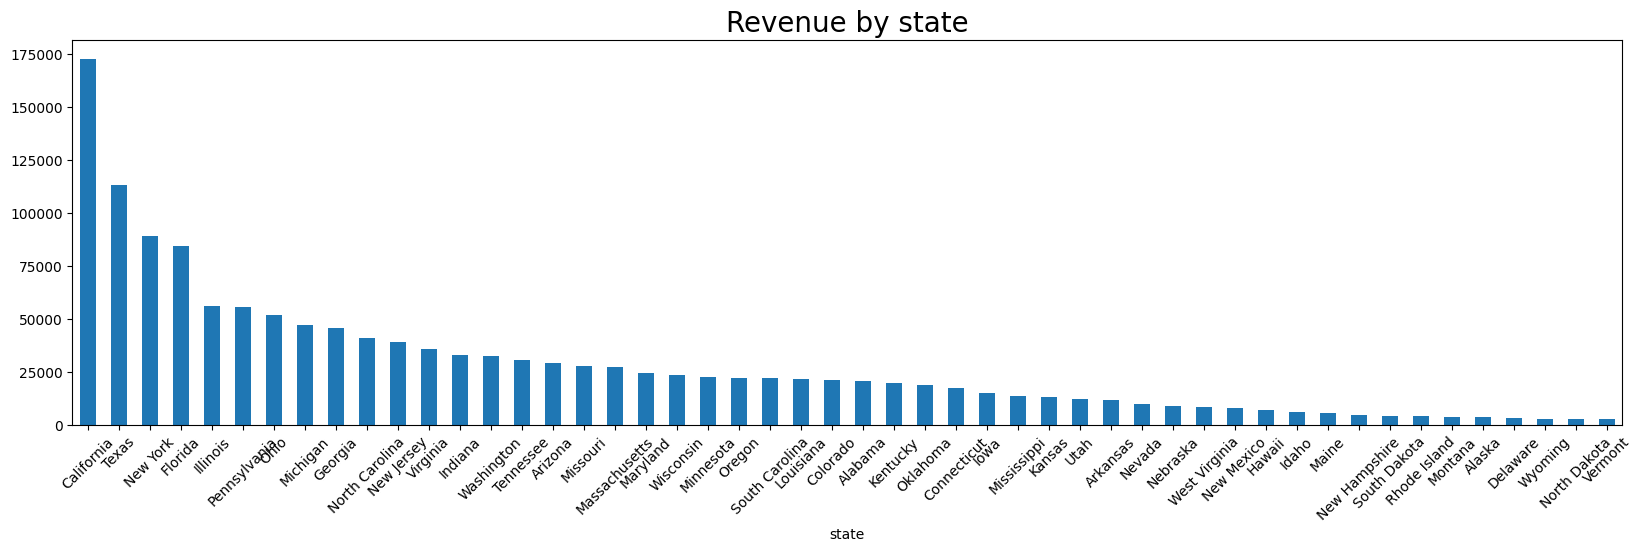

In [62]:
df_revenue_by_state = df.groupby('state')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 5))
df_revenue_by_state.plot(kind='bar')

plt.title('Revenue by state', fontsize=20)
plt.xticks(rotation=45)
plt.show()

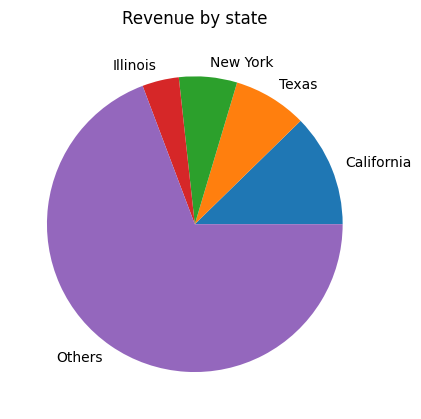

In [63]:
california_revenue = df[df['state'] == 'California']['revenue'].sum()
texas_revenue = df[df['state'] == 'Texas']['revenue'].sum()
newyork_revenue = df[df['state'] == 'New York']['revenue'].sum()
illinois_revenue = df[df['state'] == 'Illinois']['revenue'].sum()

others_revenue = df[~df['state'].isin(['California', 'Texas', 'New York', 'Illinois'])]['revenue'].sum()

plt.pie(x=[california_revenue, texas_revenue, newyork_revenue, illinois_revenue, others_revenue], labels=['California', 'Texas', 'New York', 'Illinois', 'Others'])

plt.title('Revenue by state', y=1.02)
plt.show()

In [72]:
all_states = pd.DataFrame(
    [
        ["California", california_revenue],
        ["Texas", texas_revenue],
        ["New York", newyork_revenue],
        ["Illinois", illinois_revenue],
        ["Others", others_revenue],
    ],
    columns=["state", "revenue"]
)
all_states.to_csv('exports/all_states.csv')

As we can see top 4 states: California (12.31%), Texas (8.06%), New York (6.34%) and Illinois (4%) represent 30% of the total revenue for the whole product line. This could indicate higher demand for the products int these regions compared to other states.

In [30]:
print(f"CA: {california_revenue/df['revenue'].sum()*100}%")
print(f"TX: {texas_revenue/df['revenue'].sum()*100}%")
print(f"NY: {newyork_revenue/df['revenue'].sum()*100}%")
print(f"IL: {illinois_revenue/df['revenue'].sum()*100}%")

#together 30%

CA: 12.315686953381979%
TX: 8.06655238544293%
NY: 6.348516363065581%
IL: 4.010568519594517%


### Does years as a customer influence revenue

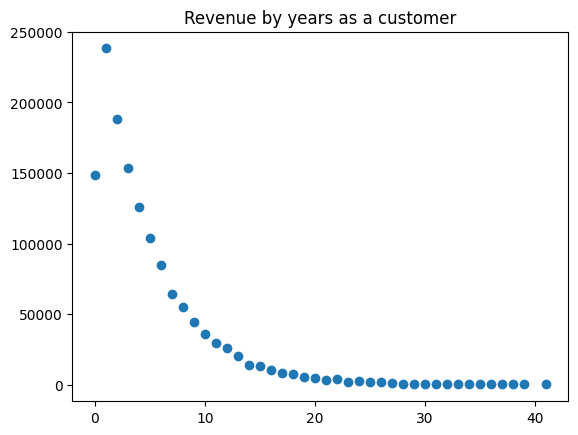

In [31]:
revenue_by_years_as_customer = pd.DataFrame(df.groupby('years_as_customer')['revenue'].sum())

plt.scatter(revenue_by_years_as_customer.index, revenue_by_years_as_customer['revenue'])

plt.title('Revenue by years as a customer')
plt.show()

In [74]:
revenue_by_years_as_customer.to_csv('exports/revenue_by_years_as_customer.csv')

We can see a negative correlation between two variables. Long-standing clients are not interested in the new products offered by Pens and Printers.

### Does number of website visits correlate with the revenue

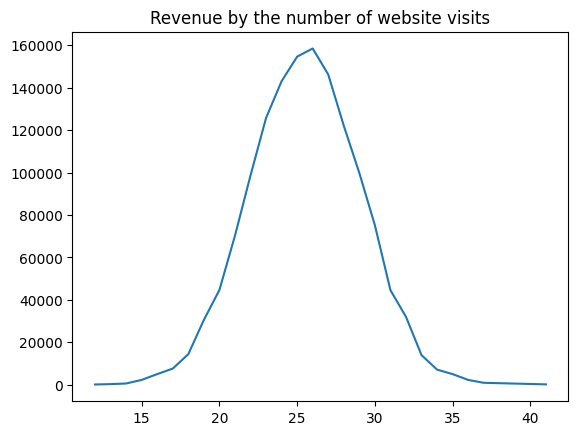

In [32]:
revenue_by_visits = pd.DataFrame(df.groupby('nb_site_visits')['revenue'].sum())

plt.plot(revenue_by_visits.index, revenue_by_visits['revenue'])
plt.title('Revenue by the number of website visits')
plt.show()

Optimal number of visits is around 25. Clients with this number of website visits brought the majority of the revenue.

In [75]:
revenue_by_visits.to_csv('exports/revenue_by_visits.csv')

## Based on the data, which method would you recommend we continue to use?

In [33]:
#Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

I would recommend using Emails + Calls method as it requires less effort from the sales team and brings more revenue than the Calls or Email methods. Average revenue per method:
* Emails - 96.57$\
* Calls - 49.12$
* Emails + Calls: 170.87$

- First email may 'plant and idea' of the new product line within customer's head. But if you don't remind about it in time it will be too late, as we saw in Emails method. Three weeks is a long delay after which customers are not willing to buy anymore.
 - Calling a customer does not generate more profit in the end despite higher effort

So, in summary I would recommend Emailing customer and then calling them week later. This approach the best dynamic over time with average weekly increase of almost 50%.

## Business metrics

Since our goal is to see what sales methods were most effective, I would recommend we use total revenue by sales method and revenue over time for each sales method as our business metrics.
If we see positive dynamics in the revenue for the Emails + Calls method (now it is 440,000$)  it would indicate very good sign to achieve our goal.


## Recommendation

* Data for the last 6 weeks showed that despite email having the biggest share of the total revenue, it also showed biggest drop in week-to-week revenue metric. Email was effective at the product line launch, but for the long term we should focus on the Emails + Calls method as it showed steady weekly surplus in the revenue and higher average return in total.
* Geographical segmentation showed that the best performing states are California, Texas, New York and Illinois which represent 30% of the total revenue for the whole product line. We should focus on these regions and make sure customers here are always satisfied.
* Old customers were not interested in the new products. We should target reletively new customer base.
* Optimal number of website visits is around 25 for the last 6 month. We should prioritize customers with such number of visits in our sales strategy.